# 第三次作业 神经网络

In [7]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
%matplotlib inline

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def forward(self, X):
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = self.sigmoid(self.output_layer_input)
        return self.output
    
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    
    def backward(self, X, y, learning_rate):
        error = y - self.output
        output_delta = error * self.sigmoid_derivative(self.output)
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * self.sigmoid_derivative(self.hidden_layer_output)
        
        self.weights_hidden_output += learning_rate * np.dot(self.hidden_layer_output.T, output_delta)
        self.bias_output += learning_rate * np.sum(output_delta, axis=0)
        self.weights_input_hidden += learning_rate * np.dot(X.T, hidden_delta)
        self.bias_hidden += learning_rate * np.sum(hidden_delta, axis=0)
    
    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            output = self.forward(X)
            loss = np.mean((y - output) ** 2)
            print(f'Epoch {epoch+1}, Loss: {loss}')
            self.backward(X, y, learning_rate)

if __name__ == '__main__':
    df = pd.read_excel('作业01.xlsx')
    df = df.drop('ID', axis=1)
    df['Home Owner'] = df['Home Owner'].map({"Yes": 1, "No": 0})
    df['Marital Status'] = df['Marital Status'].map({"Single": 0, "Divorced": 0, "Married": 1})
    df['Annual Income'] = df['Annual Income'].str.replace('K', '').astype(float)
    df['Defaulted Borrower'] = df['Defaulted Borrower'].map({"Yes": 1, "No": 0})
    columns_to_standardize = ['Home Owner', 'Marital Status', 'Annual Income']
    scaler = StandardScaler()
    df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
    print(df)
    input_size = 3  # 输入特征数
    hidden_size = 2  # 隐藏层节点数
    output_size = 1  # 输出节点数
    learning_rate = 0.03  # 学习率
    epochs = 10  # 迭代次数
    X = df[['Home Owner', 'Marital Status', 'Annual Income']].values
    y = df['Defaulted Borrower'].values.reshape(-1, 1)
    model = NeuralNetwork(input_size, hidden_size, output_size)
    model.train(X, y, epochs, learning_rate)


   Home Owner  Marital Status  Annual Income  Defaulted Borrower
0    1.527525       -0.816497       0.485104                   0
1   -0.654654        1.224745      -0.092401                   0
2   -0.654654       -0.816497      -0.785406                   0
3    1.527525        1.224745       0.369603                   0
4   -0.654654       -0.816497      -0.207902                   1
5   -0.654654        1.224745      -1.016408                   0
6    1.527525       -0.816497       2.679620                   0
7   -0.654654       -0.816497      -0.438903                   1
8   -0.654654        1.224745      -0.669905                   0
9   -0.654654       -0.816497      -0.323402                   1
Epoch 1, Loss: 0.2506982958663001
Epoch 2, Loss: 0.24723736994132267
Epoch 3, Loss: 0.2438704736165759
Epoch 4, Loss: 0.24059815510992869
Epoch 5, Loss: 0.23742069901966673
Epoch 6, Loss: 0.23433812906681642
Epoch 7, Loss: 0.23135021318318114
Epoch 8, Loss: 0.22845647085187348
Epoch 9

把home owner yes标记为1,反之为0，Marital Status中Married标记为1，剩下两种标记为0，Annual Income把K去掉转换为浮点数，结果也转换为0，1，对数据进行标准化，构建前馈神经网络，使用logistic函数作为激活函数，网络结构如下图所示

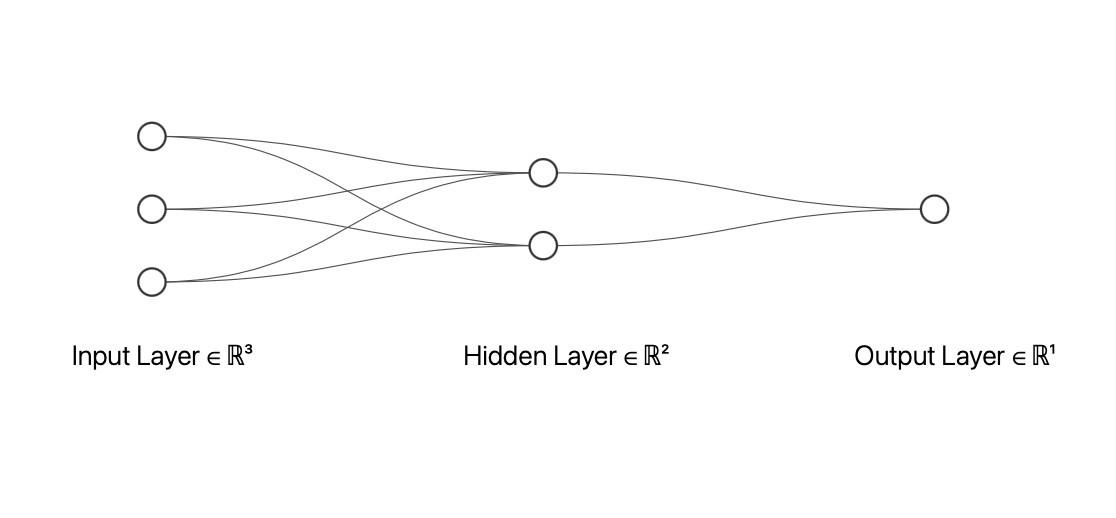

In [8]:
from IPython.display import Image
Image(filename='./nn.jpg')

反向传播算法通过从后往前计算梯度，这样计算后面的梯度的时候用链式法则计算后面的部分已经计算完了，可以节省资源，将以上五个节点按从左到右从上到下标记为x1,x2,...,不考虑偏置和激活函数，目标函数为E,在反向传播时首先计算$\frac{\partial{E}}{\partial{x4}}=\frac{\partial{E}}{\partial{y}}\frac{\partial{y}}{\partial{x4}}$,以此类推，权重往负梯度方向减小，乘上学习率，目标函数依次减小